In [58]:
# Importing the relevant packages

import os
import nifty8 as ift
import numpy as np
import matplotlib.pyplot as pl
import sys
import importlib
import xarray as array
import scipy.stats as st

# Importing the relevant functions from RMInterpol

from Functions.helpers import load_field_model
from Operators.SkyProjector import SkyProjector
from Operators.IVG import InverseGammaOperator
from Operators.PlaneProjector import PlaneProjector
from Functions.data import get_real_data, get_mock_data
from Functions.plot import data_and_prior_plot, progress_plot


# Importing the parameters for data generation from the simulation boxes 
# This is not necessary if you are using the pre-existing data 
from Parameters import data_from_simulations_template as pm

# This is for generation of the simulated foreground RM  
from generate_simulated_data import main

## Creating the simulated data
(This can be skipped if you are using the pre-existing data)

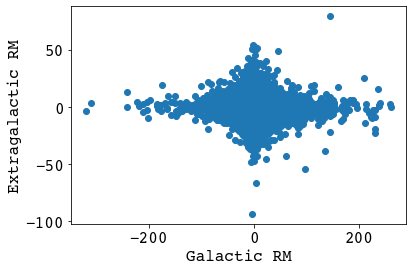

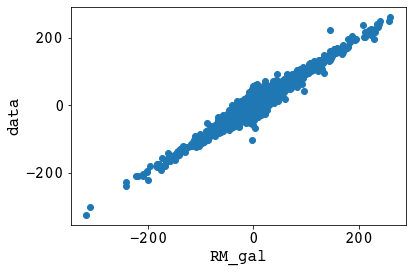

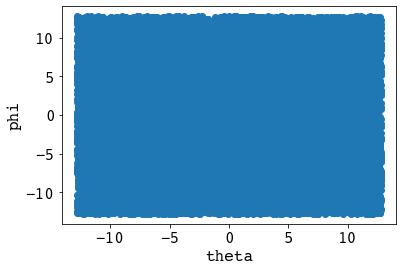

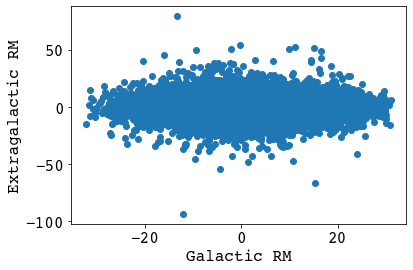

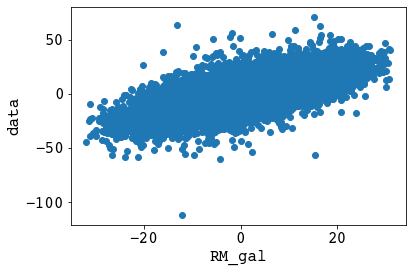

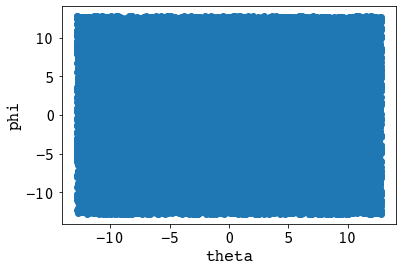

In [59]:
# Generating the simulated data from the simulation boxes. To change the filename, change the  the `data_from_simulations_template` module

simulation_names = ['Results_Filamentary', 'Results_Patchy']


general_parameter_dict = getattr(pm, 'data_params')
domain_dict = getattr(pm, 'domain_params')
egal_dict = getattr(pm, 'extragal_params')
for simulation_name in simulation_names:
    main(**general_parameter_dict, domain_parameters = domain_dict, extragal_params = egal_dict, simulation_name = simulation_name)


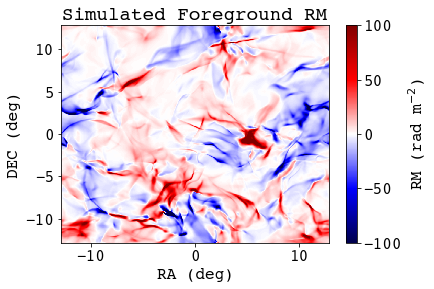

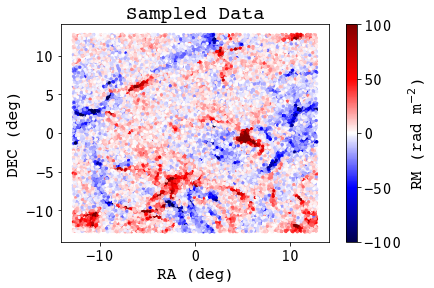

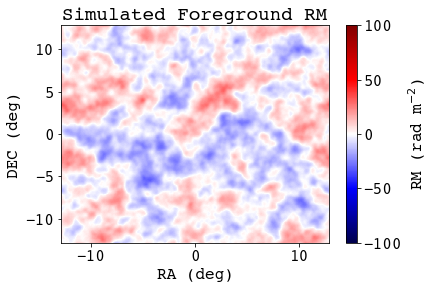

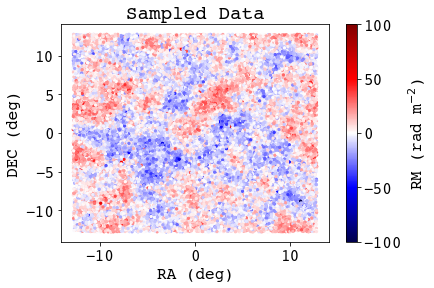

In [60]:
# Plotting the simulated foreground RM
# NOTE: Only a cutout of these RMs is used in the paper to save compuational time but the results easily generalize to the entire patch displayed below
# NOTE: The sampled data includes extragalactic contributions. This can be changed by adjusting 'extragal_params' in the parameter file

paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']
simulation_names = ['Results_Filamentary', 'Results_Patchy']

def Plotting_Foreground(paths, simulation_names):
    """ 
    Function to plot the simulated foreground RM
    
    Parameters
    ----------
    paths: Provides the path to the sampled data 
    simulation_names: Provides the names of the simulated foreground RMs

    Returns
    ---------
    None
    """
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"




    for i in range(len(paths)):
        path = paths[i]
        simulation_name = simulation_names[i]

        data = np.load(path+"data.npy")
        phi = np.load(path+"phi.npy")

        theta =np.load(path+"theta.npy")


        fil_sim = np.load('../Simulations/' + simulation_name +'/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy').transpose()

        x, y = np.linspace(theta.min(), theta.max(), 512), np.linspace(phi.min(), phi.max(), 512)
        funcx, funcy = np.meshgrid(x, y)

        # Plotting the true foreground RM 
        val_min, val_max = -100, 100
        fig1, ax1 = pl.subplots()
        c1 = ax1.pcolormesh(funcx, funcy, fil_sim, cmap='seismic', vmin = val_min, vmax = val_max)
        pl.title('Simulated Foreground RM')
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')


        # Plotting the data we will use
        fig2, ax2 = pl.subplots()
        im2 = ax2.scatter(theta, phi, c = data, cmap='seismic', vmin = -100, vmax = 100, s =5 )
        colorbar2 = fig2.colorbar(im2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        pl.title("Sampled Data")
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
Plotting_Foreground(paths, simulation_names)

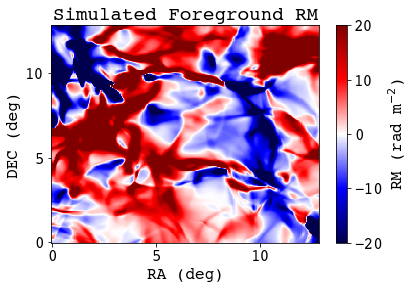

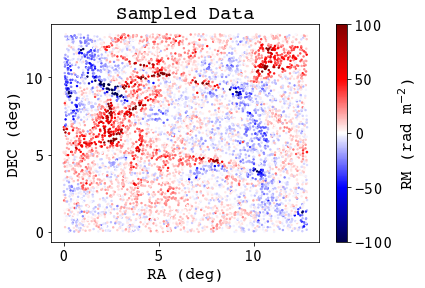

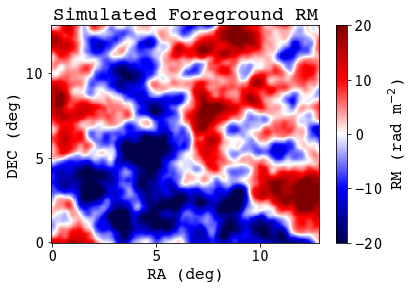

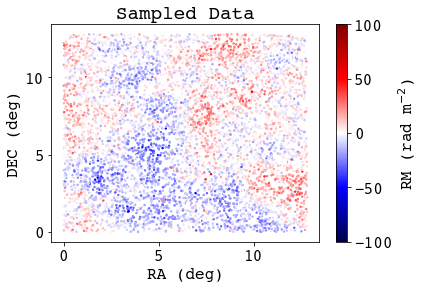

In [61]:
# Here, we will be plotting the cutout that is used in the paper
# NOTE: The sampled data might not be identical to the one used in the paper as the algorithm randomly samples the simulation box each time 


paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']
simulation_names = ['Results_Filamentary', 'Results_Patchy']

def Plotting_Foreground_Cutout(paths, simulation_names, nx = 256, ny = 256):
    """ 
    Function to plot the cutout of the simulated foreground RM
    
    Parameters
    ----------
    paths: Provides the path to the sampled data 
    simulation_names: Provides the names of the simulated foreground RMs

    Returns
    ---------
    None
    """

    for i in range(len(paths)):
        path = paths[i]
        simulation_name = simulation_names[i]

        old_data = np.load(path+"data.npy")
        old_phi = np.load(path+"phi.npy")
        old_theta =np.load(path+"theta.npy")
        old_gal_rm = np.load(path + "gal_rm.npy")
        old_noise_sigma = np.load(path + "noise_sigma.npy")



        old_data_2 = old_data[np.where(old_theta < 0)]
        old_phi_2 = old_phi[np.where(old_theta < 0)]
        old_theta_2 = old_theta[np.where(old_theta < 0)]
        old_gal_rm_2 = old_gal_rm[np.where(old_theta < 0)]
        old_noise_sigma_2 = old_noise_sigma[np.where(old_theta < 0)]



        data = old_data_2[np.where(old_phi_2 < 0)]
        phi = old_phi_2[np.where(old_phi_2 < 0)]
        theta = old_theta_2[np.where(old_phi_2 < 0)]
        gal_rm = old_gal_rm_2[np.where(old_phi_2 < 0)]
        noise_sigma = old_noise_sigma_2[np.where(old_phi_2 < 0)]


        theta = -theta
        phi = -phi


        fil_sim = np.load('../Simulations/' + simulation_name +'/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy').transpose()

        fil_sim_cutout = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(0, theta.max(), nx), np.linspace(0, phi.max(), ny)
        funcx, funcy = np.meshgrid(x, y)

        val_min, val_max = -20, 20
        fig4, ax4 = pl.subplots()
        c4 = ax4.pcolormesh(x, y, fil_sim_cutout, cmap='seismic', vmin = val_min, vmax = val_max)
        pl.title('Simulated Foreground RM')
        colorbar4 = fig4.colorbar(c4, ax = ax4)
        colorbar4.set_label('RM (rad m$^{-2}$)')
        ax4.set_xlabel('RA (deg)')
        ax4.set_ylabel('DEC (deg)')
        ax4.set_yticks((0, 5, 10))

        fig5, ax5 = pl.subplots()
        im5 = ax5.scatter(theta, phi, c = data, cmap='seismic', vmin = -100, vmax = 100, s = 2)
        colorbar5 = fig5.colorbar(im5)
        colorbar5.set_label('RM (rad m$^{-2}$)')
        pl.title("Sampled Data")
        ax5.set_xlabel('RA (deg)')
        ax5.set_ylabel('DEC (deg)')
        ax5.set_yticks((0, 5, 10))

Plotting_Foreground_Cutout(paths, simulation_names)

## Removing Extragalactic RM

In [62]:
from numpy import linalg as l
from scipy import spatial

paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']

def remove_extragal_rm(paths, cutoff = 3):
    """
    Function to remove the extragalactic RM
    
    Parameters
    ----------
    paths: Gives the paths to the sampled data 
    cutoff: The cutoff for removing the extragalactic RM; 3 by default 

    Returns
    --------
    ntheta: The RA of the points after removing the extragalactic RM for both simulations
    nphi: Th DEC of the points after removing the extragalactic RM for both simulations
    data: RM data after removal of extragalactic sources for both simulatons 
    noise: The noise in the RM after the removal of the extragalctic sources for both simulations
    noise_sigma: The deviation in the noise in the RM after removal of the extragalactic sources for both simulations
    """

    ntheta_array = []
    nphi_array = []
    data_array = []
    noise_sigma_array = []
    noise_array = []
    gal_array = []
    for path in paths:
        
        old_data = np.load(path+"data.npy")
        old_phi = np.load(path+"phi.npy")
        old_theta =np.load(path+"theta.npy")
        old_gal_rm = np.load(path + "gal_rm.npy")
        old_noise_sigma = np.load(path + "noise_sigma.npy")
        old_noise = np.load(path + "noise.npy")



        old_data_2 = old_data[np.where(old_theta < 0)]
        old_phi_2 = old_phi[np.where(old_theta < 0)]
        old_theta_2 = old_theta[np.where(old_theta < 0)]
        old_gal_rm_2 = old_gal_rm[np.where(old_theta < 0)]
        old_noise_sigma_2 = old_noise_sigma[np.where(old_theta < 0)]
        old_noise_2 = old_noise[np.where(old_theta<0)]



        data = old_data_2[np.where(old_phi_2 < 0)]
        phi = old_phi_2[np.where(old_phi_2 < 0)]
        theta = old_theta_2[np.where(old_phi_2 < 0)]
        gal_rm = old_gal_rm_2[np.where(old_phi_2 < 0)]
        noise_sigma = old_noise_sigma_2[np.where(old_phi_2 < 0)]
        noise = old_noise_2[np.where(old_phi_2 < 0)]


        theta = -theta
        phi = -phi

        #Loading the data

        points= np.vstack((theta, phi))
        points = np.transpose(points)




        #Code to find he nearest 10 neighbours of a given data point

        i = 0
        while i < len(data):
            currentdata = np.delete(data, i)
            currentgal_rm = np.delete(gal_rm, i)
            currentnoise_sigma = np.delete(noise_sigma, i)
            currentnoise = np.delete(noise, i)
            currentpts = np.delete(points, i, 0)
            currentpoint = points[i]
            rmlist = np.zeros((10))
            counter = 0 
            for j in range(10):
                distance,index = spatial.KDTree(currentpts).query(currentpoint)
                rmlist[counter] = currentdata[index]
                currentdata = np.delete(currentdata, index, 0)
                currentgal_rm = np.delete(currentgal_rm, index, 0)
                currentnoise_sigma = np.delete(currentnoise_sigma, index, 0)
                currentnoise = np.delete(currentnoise, index, 0)
                currentpts = np.delete(currentpts, index, 0)
                counter = counter + 1
            mean = np.mean(rmlist)
            std = np.std(rmlist)
            if data[i] >= (mean+3*std) or data[i]<=(mean - 3*std):
                data = np.delete(data, i)
                gal_rm = np.delete(gal_rm, i)
                noise_sigma = np.delete(noise_sigma, i)
                noise = np.delete(noise, i)
                points = np.delete(points, i, 0)
            i = i + 1 


        ntheta = points[: , 0] 
        nphi = points[:, 1] 

        ntheta_array.append(ntheta)
        nphi_array.append(nphi)
        data_array.append(data)
        gal_array.append(gal_rm)
        noise_sigma_array.append(noise_sigma)
        noise_array.append(noise)

        if 'patchy' in path:
            np.save('Data/simulated_cutout_patchy/test/data.npy', data)
            np.save('Data/simulated_cutout_patchy/test/gal_rm.npy', gal_rm)
            np.save('Data/simulated_cutout_patchy/test/theta.npy', ntheta)
            np.save('Data/simulated_cutout_patchy/test/phi.npy', nphi)
            np.save('Data/simulated_cutout_patchy/test/noise.npy', noise)
            np.save('Data/simulated_cutout_patchy/test/noise_sigma.npy', noise_sigma)
        elif 'fil' in path: 
            np.save('Data/simulated_cutout_fil/test/data.npy', data)
            np.save('Data/simulated_cutout_fil/test/gal_rm.npy', gal_rm)
            np.save('Data/simulated_cutout_fil/test/theta.npy', ntheta)
            np.save('Data/simulated_cutout_fil/test/phi.npy', nphi)
            np.save('Data/simulated_cutout_fil/test/noise.npy', noise)
            np.save('Data/simulated_cutout_fil/test/noise_sigma.npy', noise_sigma)
        else: 
            np.save('Data/simulated_cutout_example/test/data.npy', data)
            np.save('Data/simulated_cutout_example/test/gal_rm.npy', gal_rm)
            np.save('Data/simulated_cutout_example/test/theta.npy', ntheta)
            np.save('Data/simulated_cutout_example/test/phi.npy', nphi)
            np.save('Data/simulated_cutout_example/test/noise.npy', noise)
            np.save('Data/simulated_cutout_example/test/noise_sigma.npy', noise_sigma)
    return ntheta_array, nphi_array, data_array, noise_array, noise_sigma_array, gal_array

ntheta_array, nphi_array, data_array, noise_array, noise_sigma_array, gal_array = remove_extragal_rm(paths)    

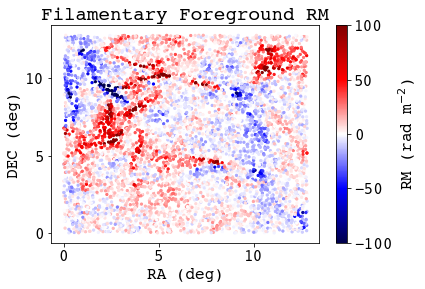

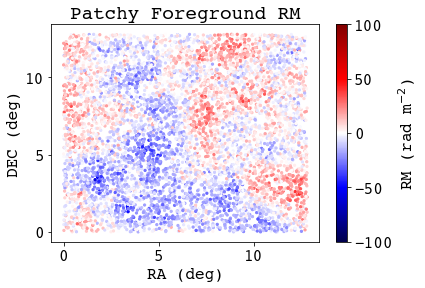

In [63]:
# Plotting the sampled data after filtering the extragalacitc RM 
pl.rcParams.update({'font.size': 16})
plot_names = ['Filamentary Foreground RM', 'Patchy Foreground RM']
grid_names =['fil', 'patchy']
for i in range(len(ntheta_array)): 
    fig6, ax6 = pl.subplots()
    im6 = ax6.scatter(ntheta_array[i], nphi_array[i], c = data_array[i], cmap='seismic', vmin = -100, vmax = 100, s =5 )
    colorbar6 = fig6.colorbar(im6)
    colorbar6.set_label('RM (rad m$^{-2}$)')
    pl.title(plot_names[i])
    ax6.set_xlabel('RA (deg)')
    ax6.set_ylabel('DEC (deg)')
    ax6.set_yticks((0, 5, 10))
    #pl.savefig('./Figs/'+grid_names[i] + '_sample.png', dpi = 300, bbox_inches = 'tight')


In [11]:
# Here, we will check that the algorithm did remove some data points

for i in range(len(paths)): 
    print(len(ntheta_array[i]))
    path = paths[i]
    old_data = np.load(path+"data.npy")
    old_phi = np.load(path+"phi.npy")
    old_theta =np.load(path+"theta.npy")
    old_gal_rm = np.load(path + "gal_rm.npy")
    old_noise_sigma = np.load(path + "noise_sigma.npy")



    old_data_2 = old_data[np.where(old_theta < 0)]
    old_phi_2 = old_phi[np.where(old_theta < 0)]
    old_theta_2 = old_theta[np.where(old_theta < 0)]
    old_gal_rm_2 = old_gal_rm[np.where(old_theta < 0)]
    old_noise_sigma_2 = old_noise_sigma[np.where(old_theta < 0)]



    data_sim = old_data_2[np.where(old_phi_2 < 0)]
    phi_sim = old_phi_2[np.where(old_phi_2 < 0)]
    theta_sim = old_theta_2[np.where(old_phi_2 < 0)]
    gal_rm_sim = old_gal_rm_2[np.where(old_phi_2 < 0)]
    noise_sigma_sim = old_noise_sigma_2[np.where(old_phi_2 < 0)]

    theta_sim  = -theta_sim
    phi_sim = - phi_sim 

    print(len(theta_sim))

# According to the algorithm used, there are more points with extragalactic contributions in the patchy foreground RM cutout. 

6393
6558
6328
6559


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


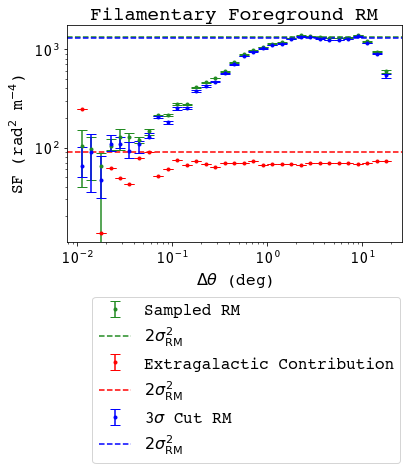

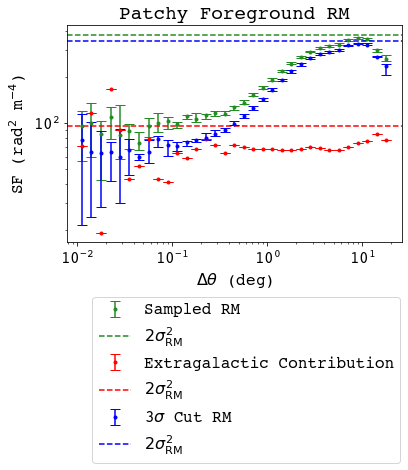

In [91]:
# Here, we will plot the 2 point structure functions using the structurefunction package from Alec Thomson
# Note: You might need to downgrade your numpy version to make the structurefunction package work 

from structurefunction import structure_function
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u 
def Plotting_Structure_Functions(n_point = 2):
    # Note: We will be assuming a zero error in all RM maps
    ''' 
    Function to plot the structure functions of the simulated RM maps, the extragalactic RMs and the residuals
    Parameters
    ----------
    n_point: Integer that refers to the number of points in the stencil; currently only n_points = 2 and n_points = 3 is supported by structurefunction
    
    Returns
    --------
    None
    '''

    from typing import Union
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"
    # Loading in the interpolated RM maps 

    def nanvar(data: Union[np.ndarray, u.Quantity]) -> Union[np.ndarray, u.Quantity]:
        """Compute the variance of an array, ignoring NaNs

        Args:
            data (Union[np.ndarray, u.Quantity]): Array

        Returns:
            Union[np.ndarray, u.Quantity]: Variance
        """

        mask = ~np.isfinite(data)
        return np.var(data[~mask])
    # Here, we will load in the coordinates and turn the arrays into a form that structurefunction can work with, i.e, (ra, dec) coordinatates with corresponding RN values
    # and setting err_RM = 0


    paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']
    cutout_paths = ['Data/simulated_cutout_fil/test/', 'Data/simulated_cutout_patchy/test/']
    grid_names = ['fil', 'patchy']

    plot_names = ['Filamentary Foreground RM', 'Patchy Foreground RM']
    for i in range(len(paths)):
        path = paths[i]
        cut_path = cutout_paths[i]

        old_data = np.load(path+"data.npy")
        old_phi = np.load(path+"phi.npy")
        old_theta =np.load(path+"theta.npy")
        old_egal_rm = np.load(path + "extragal_rm.npy", allow_pickle = True)
        old_rm_noise = np.load(path + "noise.npy")
        old_egal_noise = np.load(path + "extragal_sigma.npy", allow_pickle = True)

        old_data_2 = old_data[np.where(old_theta < 0)]
        old_phi_2 = old_phi[np.where(old_theta < 0)]
        old_theta_2 = old_theta[np.where(old_theta < 0)]
        old_egal_rm_2 = old_egal_rm[np.where(old_theta < 0)]
        old_rm_noise_2 = old_rm_noise[np.where(old_theta < 0)]
        old_egal_noise_2 = old_egal_noise[np.where(old_theta < 0)]

        data = old_data_2[np.where(old_phi_2 < 0)]
        phi = old_phi_2[np.where(old_phi_2 < 0)]
        theta = old_theta_2[np.where(old_phi_2 < 0)]
        egal_rm = old_egal_rm_2[np.where(old_phi_2 < 0)]
        rm_noise = old_rm_noise_2[np.where(old_phi_2 < 0)]
        egal_noise = old_egal_noise_2[np.where(old_phi_2 < 0)]

        theta = -theta
        phi = -phi

        cut_data = np.load(cut_path + "data.npy")
        cut_theta = np.load(cut_path + "theta.npy")
        cut_phi = np.load(cut_path  + "phi.npy")
        cut_rm_noise = np.load(cut_path + "noise.npy")


        points = np.vstack((theta, phi)).T 
        points_astro = []

        for point in points:
            points_astro.append(SkyCoord(point[0], point[1], unit = 'deg'))

        cut_points = np.vstack((cut_theta, cut_phi)).T
        cut_points_astro = []
        for cut_point in cut_points:
            cut_points_astro.append(SkyCoord(cut_point[0], cut_point[1], unit ='deg'))
        sim_tab = Table()
        
        sim_tab.add_column(points_astro, name = 'coords')
        sim_tab.add_column(data, name = 'RM')
        sim_tab.add_column(rm_noise, name = 'e_RM')
        sim_tab.add_column(egal_rm, name = 'egal_RM')
        sim_tab.add_column(egal_noise, name = 'err_egal_RM')

        cut_tab = Table()
        cut_tab.add_column(cut_points_astro, name = 'cut_coords')
        cut_tab.add_column(cut_data, name = 'cut_RM')
        cut_tab.add_column(cut_rm_noise, name = 'cut_e_RM')

        start = -2
        stop = 1.5
        step = 0.1
        bins = 10**np.arange(start, stop+step, step)*u.deg

        data_sf, _  = structure_function(data = sim_tab['RM'] * (u.rad/u.m**2), errors = sim_tab['e_RM'] * (u.rad/u.m**2), coords = sim_tab['coords'], 
                                                    samples = 10, bins=bins, show_plots=False, verbose=False, n_point = n_point) 

        egal_sf, _ = structure_function(data = sim_tab['egal_RM'] * (u.rad/u.m**2), errors = sim_tab['err_egal_RM'] * (u.rad/u.m**2), coords = sim_tab['coords'], 
                                                    samples = 1, bins  = bins, show_plots = False, verbose = False, n_point = n_point)
        cut_sf, _  = structure_function(data = cut_tab['cut_RM'] * (u.rad/u.m**2), errors = cut_tab['cut_e_RM'] * (u.rad/u.m**2), coords = cut_tab['cut_coords'], 
                                                    samples = 10, bins=bins, show_plots=False, verbose=False, n_point = n_point) 
        colors = ['forestgreen', 'red', 'blue']
        fig, ax = pl.subplots()
        med = data_sf[0]
        err_low = data_sf[1]
        err_high = data_sf[2]
        c_bins = data_sf[-1]

        ax.errorbar(c_bins, med, yerr = (err_low, err_high), label = 'Sampled RM', color = colors[0], fmt = '.', capsize = 5)

        ax.axhline(2 * np.var(sim_tab['RM'][~np.isnan(sim_tab['RM'])]), linestyle = '--', color = colors[0], label = '$2\sigma_{\mathrm{RM}}^2$')

        med = egal_sf[0]
        err_low = egal_sf[1]
        err_high = egal_sf[2]
        c_bins = egal_sf[-1]

        ax.errorbar(c_bins, med, yerr = (err_low, err_high), label = 'Extragalactic Contribution', color = colors[1], fmt = '.', capsize = 5)

        ax.axhline(2 *np.var(sim_tab['egal_RM'][~np.isnan(sim_tab['egal_RM'])]), linestyle = '--', color = colors[1], label = '$2\sigma_{\mathrm{RM}}^2$')

        med = cut_sf[0]
        err_low = cut_sf[1]
        err_high = cut_sf[2]
        c_bins = cut_sf[-1]

        ax.errorbar(c_bins, med, yerr = (err_low, err_high), label = '3$\sigma$ Cut RM', color = colors[2], fmt = '.', capsize = 5)

        ax.axhline(2 * np.var(cut_tab['cut_RM'][~np.isnan(cut_tab['cut_RM'])]), linestyle = '--', color = colors[2], label = '$2\sigma_{\mathrm{RM}}^2$')

        ax.set_title(plot_names[i])
        ax.set_xlabel('$\Delta \\theta$ (deg)')
        ax.set_ylabel('SF (rad$^2$ m$^{-4}$)')
        handles, labels = pl.gca().get_legend_handles_labels()
        order = [3, 0, 4, 1, 5, 2]
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor = (1.02, -1.05), loc = 'lower right')
        ax.loglog()
        #pl.savefig('./Figs/' + 'struc_func_' + grid_names[i] + '.png', bbox_inches = 'tight')
        pl.show()
    return


Plotting_Structure_Functions()

## Interpolation schemes

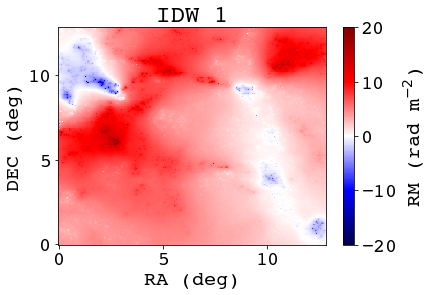

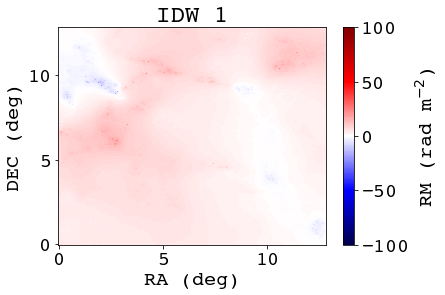

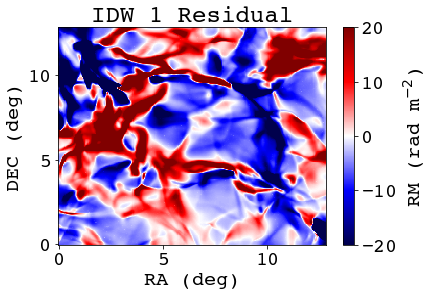

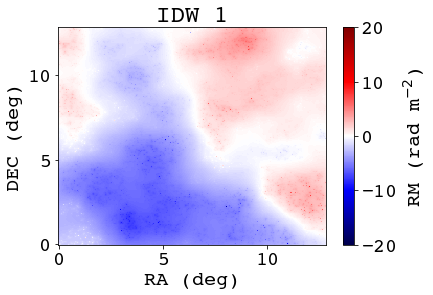

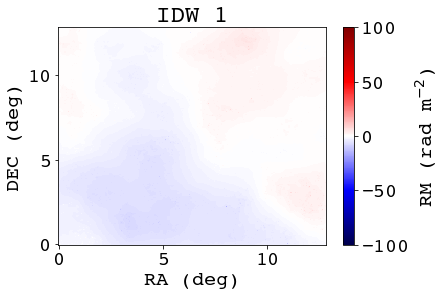

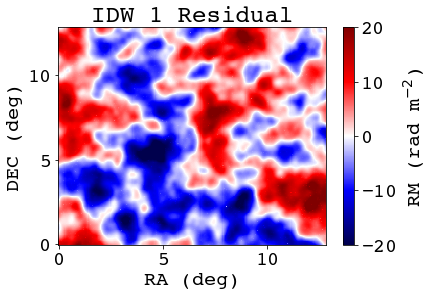

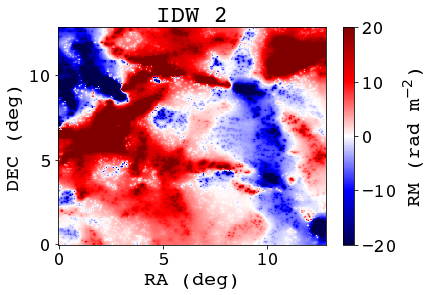

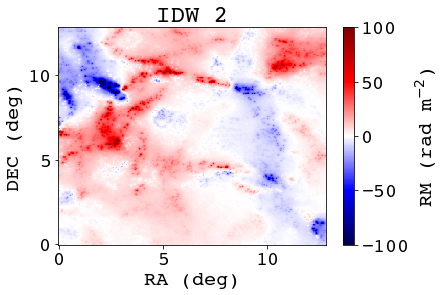

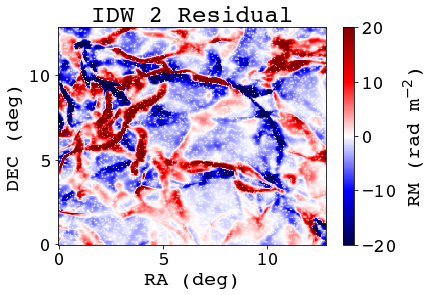

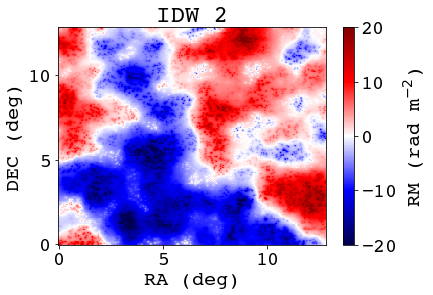

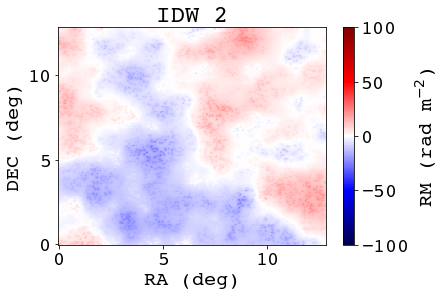

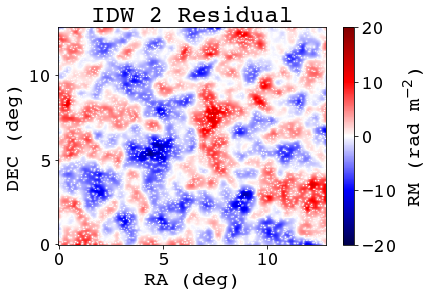

In [17]:
# Running this block of code will take a while

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']
load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


def IDW_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, p, nx = 256, ny = 256, return_arrays = True): 
    """  
    Function to test IDW interpolation for a foreground RM patch

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    p: Float that sets the power parameter of the IDW interpolation
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_IDW_array: List of NNI interpolation results for each grid
    """

    val_IDW_array = []
    plot_path = './Figs/'
    
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    def IDW(x, sample, test, p): 
            '''
            Function to compute the IDW interpolation value at a point in the interpolation region

            Parameters
            ----------
            x: Array of RA and DEC coordinates of the interpolation point
            sample: Array of RA and DEC coordinates of data points
            test: Array of RM values of data points
            p: Float that sets the power parameter of the IDW interpolation 

            Returns
            -------
            y: Float of interpolated RM value at the interpolation point 
            '''
            w1 = np.array([])
            darray = np.array([])
            y = 0 
            for i in range(len(sample[:, 1])):
                d0 = np.subtract.outer(x[0], sample[i, 0])
                d1 = np.subtract.outer(x[1], sample[i, 1])
                d = np.hypot(d0, d1)
                darray = np.append(darray, d)
                if d == 0: 
                    y = data[i]
                else: 
                    w1 = np.append(w1, (1/d)**p)
            if np.all(darray != 0): 
                y = np.sum(w1*test)/np.sum(w1)
            return y 
    
    for i in range(len(ntheta_array)):
        # Loading the simulation data
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        points = np.vstack((ntheta, nphi))
        points = np.transpose(points)

        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)
        funcx, funcy = np.meshgrid(x, y)

        # Performing IDW interpolation
        
        val_IDW = np.zeros((ny, nx))
        for i in range(ny):
            x = funcx[0][i]
            for j in range(nx):
                y = funcy[j][0]
                val_IDW[i][j] = IDW(np.array([x, y]), points, data, p)

        val_IDW = val_IDW.transpose()

        
        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/IDW{}_gal.npy'.format(str(p)), val_IDW)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/IDW{}_gal.npy'.format(str(p)), val_IDW)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/IDW{}_gal.npy'.format(str(p)), val_IDW)
            grid_name = 'example'
        
        
        fig1, ax1 = pl.subplots()
        pl.title( "IDW " + str(p))
        val_min, val_max = -20, 20
        c1 = ax1.pcolormesh(funcx, funcy, val_IDW, cmap='seismic', vmin=val_min, vmax=val_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"IDW"+str(p) + "_gal_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()
        
        fig2, ax2 = pl.subplots()
        pl.title( "IDW " + str(p))
        val_min, val_max = -100, 100
        c2 = ax2.pcolormesh(funcx, funcy, val_IDW, cmap='seismic', vmin=val_min, vmax=val_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"IDW"+str(p) + "_gal_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig3, ax3 = pl.subplots()
        pl.title( "IDW {} Residual".format(str(p)))
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_IDW), cmap = 'seismic', vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"IDW"+str(p) + "_gal_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()
    

        val_IDW_array.append(val_IDW)
    
    if return_arrays:
        return val_IDW_array
    else: 
        return

val_IDW1_array = IDW_plotting(ntheta_array, nphi_array, gal_array, simulation_paths, load_paths, p = 1)
val_IDW2_array = IDW_plotting(ntheta_array, nphi_array, gal_array, simulation_paths, load_paths, p = 2)


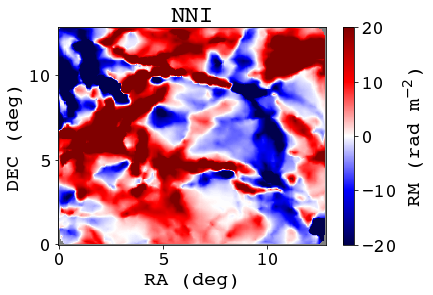

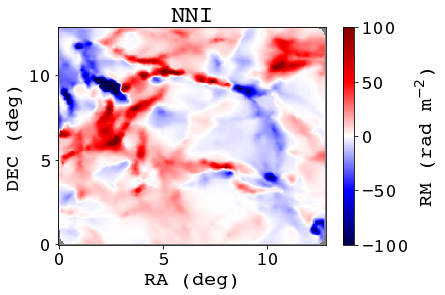

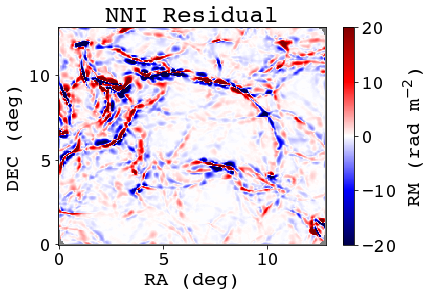

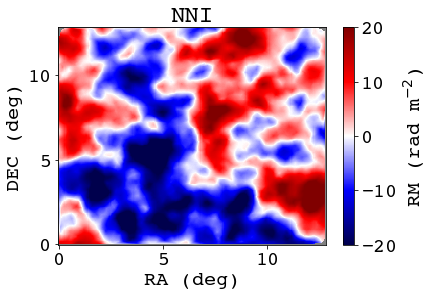

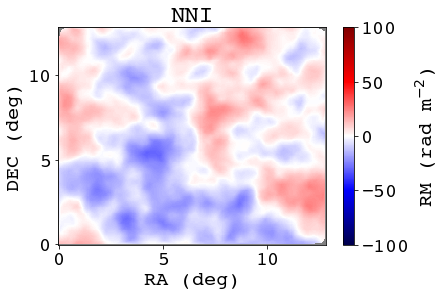

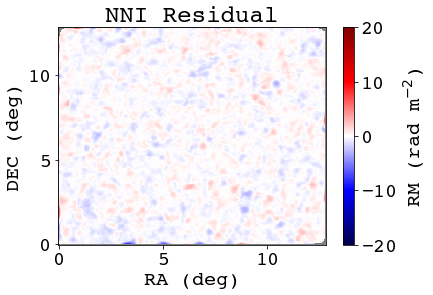

In [14]:
# Testing with NNI interpolation 

from metpy.interpolate import natural_neighbor_to_grid

ntheta_array = []
nphi_array = []
gal_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']

load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    gal_array.append(np.load(path + 'gal_rm.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def NNI_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, nx = 256, ny = 256, return_arrays = True):
    """  
    Function to test NNI interpolation for a foreground RM sky

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_NNI_array: List of NNI interpolation results for each grid
    """
    val_NNI_array = []
    plot_path = './Figs/'

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    for i in range(len(ntheta_array)):
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

        sim_gridx = np.array(np.meshgrid(x, y)).T.reshape(-1,2)[:,0]
        sim_gridy = np.array(np.meshgrid(x, y)).T.reshape(-1,2) [:, 1]

        # Performing the NNI interpolation

        val_NNI = natural_neighbor_to_grid(ntheta, nphi, data, sim_gridx, sim_gridy)

        val_NNI = val_NNI.reshape(nx, ny).T
        
        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/NNI_gal.npy', val_NNI)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/NNI_gal.npy', val_NNI)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/NNI_gal.npy', val_NNI)
            grid_name = 'example'
    
        # Plotting the results

        funcx, funcy = np.meshgrid(x, y)

        cmap = pl.cm.get_cmap('seismic').copy()
        cmap.set_bad('gray')

        fig1, ax1 = pl.subplots()
        pl.title("NNI")
        val_min, val_max = -20, 20
        c1 = ax1.pcolormesh(funcx, funcy, val_NNI, cmap=cmap, vmin=val_min, vmax=val_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"NNI_gal_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig2, ax2 = pl.subplots()
        pl.title("NNI")
        val_min, val_max = -100, 100

        c2 = ax2.pcolormesh(funcx, funcy, val_NNI, cmap=cmap, vmin=val_min, vmax=val_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"NNI_gal_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()


        # Plotting the residuals for NNI

        fig3, ax3 = pl.subplots()
        pl.title( "NNI Residual")
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_NNI), cmap = cmap, vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"NNI_gal_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_NNI_array.append(val_NNI)
       
    if return_arrays:
        return val_NNI_array
    else: 
        return
    
val_NNI_array = NNI_plotting(ntheta_array, nphi_array, gal_array, simulation_paths, load_paths)

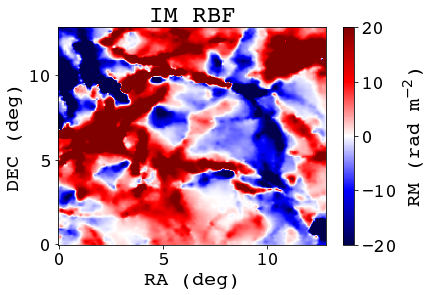

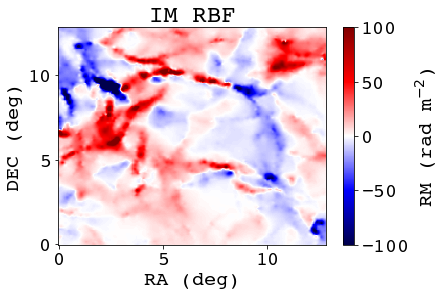

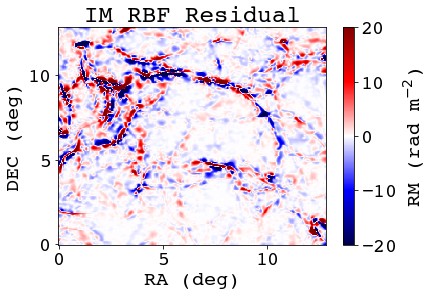

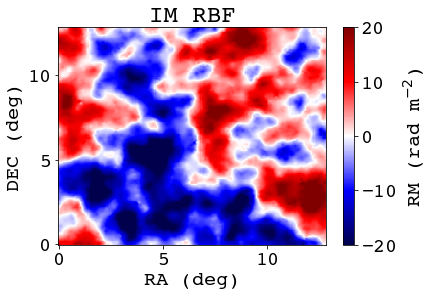

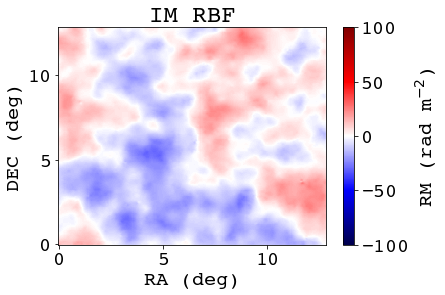

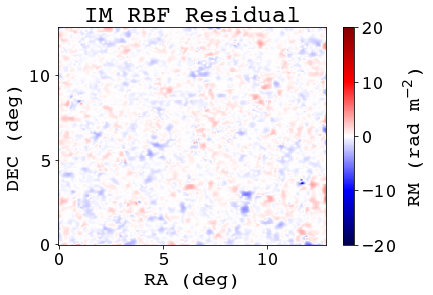

In [15]:
# Testing with IM interpolation 

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# This is needed to prevent the kernel from crashing for large data sets
from scipy.interpolate import Rbf

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']
load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def IM_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, epsilon = 0.1, nx = 256, ny = 256, return_arrays = True):
    """  
    Function to test IM interpolation for a foreground RM sky

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    epsilon: Float that controls the shape parameter; 1 by default 
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_IM_array: List of IM interpolation results for each grid
    """
    val_IM_array = []
    plot_path = './Figs/'

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    for i in range(len(ntheta_array)):
        # Loading in the data
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

        # Performing the IM interpolation 
        rbf = Rbf(ntheta, nphi, data, function = 'inverse', epsilon = epsilon)
        ti = np.linspace(ntheta.min(), ntheta.max(), nx)
        pi = np.linspace(nphi.min(), nphi.max(), ny)

        xi, yi = np.meshgrid(ti, pi)

        val_IM  = rbf(xi, yi)

        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/IM_gal.npy', val_IM)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/IM_gal.npy', val_IM)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/IM_gal.npy', val_IM)
            grid_name = 'example'

        fig1, ax1 = pl.subplots()
        pl.title( "IM RBF")
        valRBF_min, valRBF_max = -20, 20
        c1 = ax1.pcolormesh(xi, yi, val_IM, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"IM_gal_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        # Plotting the results 
        funcx, funcy = np.meshgrid(x, y)
        

        fig2, ax2 = pl.subplots()
        pl.title( "IM RBF")
        valRBF_min, valRBF_max = -100, 100
        c2 = ax2.pcolormesh(xi, yi, val_IM, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"IM_gal_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig3, ax3 = pl.subplots()
        pl.title( "IM RBF Residual")
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_IM), cmap = 'seismic', vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"IM_gal_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_IM_array.append(val_IM)

    if return_arrays:
        return val_IM_array
    else: 
        return

val_IM_array = IM_plotting(ntheta_array, nphi_array, gal_array, simulation_paths, load_paths)
    

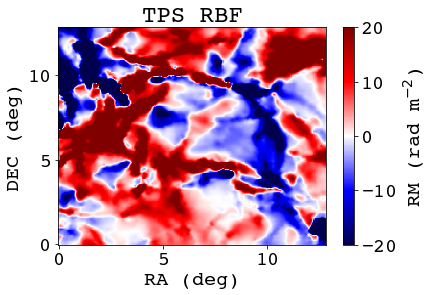

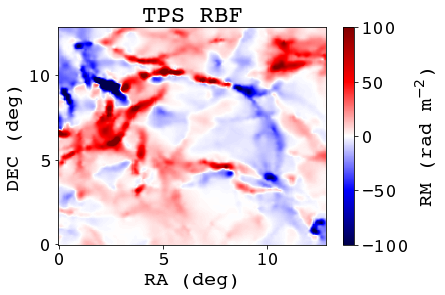

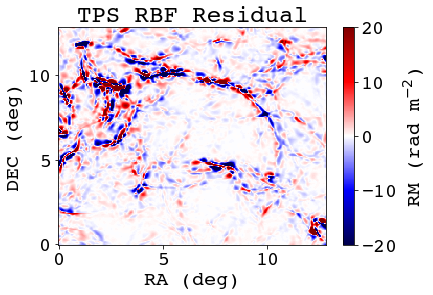

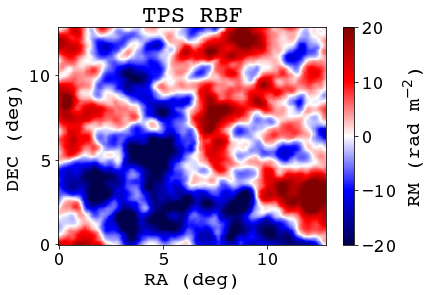

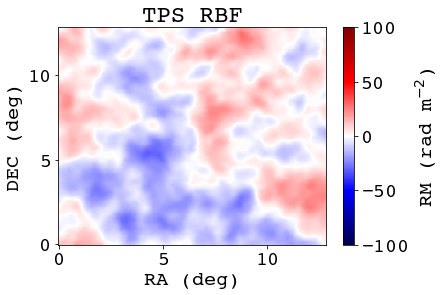

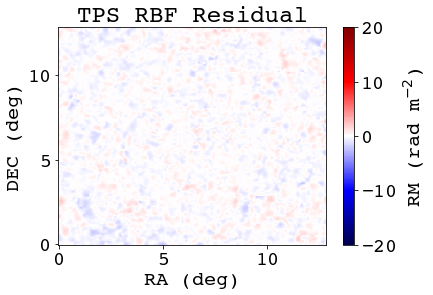

In [16]:
# Testing with TPS interpolation 

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# This is needed to prevent the kernel from crashing for large data sets

from scipy.interpolate import Rbf

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []

load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def TPS_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, epsilon = 0.1, nx = 256, ny = 256, return_arrays = True):
    """  
    Function to test IM interpolation for a foreground RM sky

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    epsilon: Float that controls the shape parameter; 1 by default 
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_TPS_array: List of TPS interpolation results for each grid
    """
    val_TPS_array = []
    plot_path = './Figs/'

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    for i in range(len(ntheta_array)):
        # Loading in the data
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

        # Performing the IM interpolation 
        rbf = Rbf(ntheta, nphi, data, function = 'thin_plate', epsilon = epsilon)
        ti = np.linspace(ntheta.min(), ntheta.max(), nx)
        pi = np.linspace(nphi.min(), nphi.max(), ny)

        xi, yi = np.meshgrid(ti, pi)

        val_TPS  = rbf(xi, yi)

        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/TPS_gal.npy', val_TPS)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/TPS_gal.npy', val_TPS)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/TPS_gal.npy', val_TPS)
            grid_name = 'example'

        fig1, ax1 = pl.subplots()
        pl.title( "TPS RBF")
        valRBF_min, valRBF_max = -20, 20
        c1 = ax1.pcolormesh(xi, yi, val_TPS, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"TPS_gal_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        # Plotting the results 
        funcx, funcy = np.meshgrid(x, y)
        

        fig2, ax2 = pl.subplots()
        pl.title( "TPS RBF")
        valRBF_min, valRBF_max = -100, 100
        c2 = ax2.pcolormesh(xi, yi, val_TPS, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"TPS_gal_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig3, ax3 = pl.subplots()
        pl.title( "TPS RBF Residual")
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_TPS), cmap = 'seismic', vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        #pl.savefig(plot_path+"TPS_gal_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_TPS_array.append(val_TPS)

    if return_arrays:
        return val_TPS_array
    else: 
        return

val_TPS_array = TPS_plotting(ntheta_array, nphi_array, gal_array, simulation_paths, load_paths)
    

In [29]:
mean_res_array

[6.93797618311943, 5.8482971631485]

sampler: Iteration #0 energy=3.000963E+11 diff=3.000963E+11 crit=1.0E-07 clvl=0
sampler: Iteration #1 energy=4.242720E+09 diff=2.958536E+11 crit=1.0E-07 clvl=0
sampler: Iteration #2 energy=2.823297E+09 diff=1.419422E+09 crit=1.0E-07 clvl=0
sampler: Iteration #3 energy=2.246439E+09 diff=5.768587E+08 crit=1.0E-07 clvl=0
sampler: Iteration #4 energy=1.781762E+09 diff=4.646761E+08 crit=1.0E-07 clvl=0
sampler: Iteration #5 energy=1.216196E+09 diff=5.655669E+08 crit=1.0E-07 clvl=0
sampler: Iteration #6 energy=1.041313E+09 diff=1.748823E+08 crit=1.0E-07 clvl=0
sampler: Iteration #7 energy=6.926187E+08 diff=3.486945E+08 crit=1.0E-07 clvl=0


Starting global iteration #0


sampler: Iteration #8 energy=6.813191E+08 diff=1.129954E+07 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=5.664926E+08 diff=1.148265E+08 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=4.762607E+08 diff=9.023191E+07 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=3.875813E+08 diff=8.867941E+07 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=3.050684E+08 diff=8.251285E+07 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=2.559960E+08 diff=4.907249E+07 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=2.521571E+08 diff=3.838834E+06 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=2.246425E+08 diff=2.751458E+07 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=1.994718E+08 diff=2.517072E+07 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=1.801645E+08 diff=1.930736E+07 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=1.791820E+08 diff=9.824162E+05 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=1.583741E+08 diff=2.080795E+07 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=

Starting global iteration #1


sampler: Iteration #8 energy=-7.299703E+04 diff=1.447236E+00 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=-7.393247E+04 diff=9.354335E+02 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=-7.465467E+04 diff=7.222026E+02 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-7.508471E+04 diff=4.300423E+02 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-7.521933E+04 diff=1.346165E+02 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-7.562651E+04 diff=4.071797E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-7.562811E+04 diff=1.603700E+00 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.563550E+04 diff=7.390149E+00 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.591113E+04 diff=2.756313E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.615179E+04 diff=2.406569E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.642587E+04 diff=2.740807E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.661441E+04 diff=1.885415E+02 crit=1.0E-07 clvl=0
sampler: Iteration

Starting global iteration #2


sampler: Iteration #8 energy=-5.237771E+04 diff=9.392677E+03 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=-5.292293E+04 diff=5.452195E+02 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=-5.633040E+04 diff=3.407470E+03 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-5.648259E+04 diff=1.521861E+02 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-5.886935E+04 diff=2.386762E+03 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-6.245130E+04 diff=3.581950E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-6.411700E+04 diff=1.665701E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.444282E+04 diff=3.258238E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.588859E+04 diff=1.445764E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-6.667552E+04 diff=7.869276E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-6.775613E+04 diff=1.080611E+03 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-6.869494E+04 diff=9.388146E+02 crit=1.0E-07 clvl=0
sampler: Iteration

Starting global iteration #3


sampler: Iteration #11 energy=-5.268607E+04 diff=4.371173E+03 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-5.300633E+04 diff=3.202540E+02 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-5.611135E+04 diff=3.105027E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-5.945617E+04 diff=3.344814E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.200183E+04 diff=2.545661E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.203343E+04 diff=3.160156E+01 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-6.369123E+04 diff=1.657799E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-6.497016E+04 diff=1.278934E+03 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-6.554157E+04 diff=5.714099E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-6.562209E+04 diff=8.051753E+01 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-6.703240E+04 diff=1.410309E+03 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-6.816930E+04 diff=1.136896E+03 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #4


sampler: Iteration #13 energy=-4.230446E+04 diff=4.728857E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-4.639275E+04 diff=4.088283E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-5.037533E+04 diff=3.982584E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-5.100327E+04 diff=6.279430E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-5.341805E+04 diff=2.414778E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-5.656028E+04 diff=3.142233E+03 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-5.862451E+04 diff=2.064224E+03 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-5.879897E+04 diff=1.744618E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-5.886336E+04 diff=6.439037E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-6.110784E+04 diff=2.244482E+03 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-6.279860E+04 diff=1.690761E+03 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-6.280972E+04 diff=1.112139E+01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #5


sampler: Iteration #7 energy=8.950992E+03 diff=2.325280E+04 crit=1.0E-07 clvl=0
sampler: Iteration #8 energy=-5.790098E+03 diff=1.474109E+04 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=-7.470786E+03 diff=1.680688E+03 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=-1.631954E+04 diff=8.848755E+03 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-2.624574E+04 diff=9.926196E+03 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-2.676678E+04 diff=5.210476E+02 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-3.410832E+04 diff=7.341536E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-3.798709E+04 diff=3.878766E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-4.368058E+04 diff=5.693497E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-4.787798E+04 diff=4.197397E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-4.790975E+04 diff=3.177346E+01 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-5.128671E+04 diff=3.376959E+03 crit=1.0E-07 clvl=0
sampler: Iteration #

Starting global iteration #6


sampler: Iteration #1 energy=3.385631E+05 diff=5.037411E+06 crit=1.0E-07 clvl=0
sampler: Iteration #2 energy=2.874661E+05 diff=5.109700E+04 crit=1.0E-07 clvl=0
sampler: Iteration #3 energy=1.930509E+05 diff=9.441521E+04 crit=1.0E-07 clvl=0
sampler: Iteration #4 energy=1.367154E+05 diff=5.633545E+04 crit=1.0E-07 clvl=0
sampler: Iteration #5 energy=9.273136E+04 diff=4.398408E+04 crit=1.0E-07 clvl=0
sampler: Iteration #6 energy=5.146186E+04 diff=4.126950E+04 crit=1.0E-07 clvl=0
sampler: Iteration #7 energy=2.970949E+04 diff=2.175238E+04 crit=1.0E-07 clvl=0
sampler: Iteration #8 energy=5.501342E+03 diff=2.420814E+04 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=-5.272387E+03 diff=1.077373E+04 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=-5.579058E+03 diff=3.066714E+02 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-1.608563E+04 diff=1.050657E+04 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-2.480307E+04 diff=8.717441E+03 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-2.

Starting global iteration #7


sampler: Iteration #11 energy=-1.123942E+04 diff=5.972300E+03 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-1.829034E+04 diff=7.050915E+03 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-2.195614E+04 diff=3.665802E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-2.879253E+04 diff=6.836394E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-3.512153E+04 diff=6.329003E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-3.946519E+04 diff=4.343657E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-4.512606E+04 diff=5.660867E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-4.795087E+04 diff=2.824814E+03 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-4.916373E+04 diff=1.212858E+03 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-5.238946E+04 diff=3.225734E+03 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-5.334639E+04 diff=9.569307E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-5.540601E+04 diff=2.059618E+03 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #8


sampler: Iteration #15 energy=-3.462416E+04 diff=6.924424E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-3.983147E+04 diff=5.207311E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-4.432128E+04 diff=4.489812E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-4.807341E+04 diff=3.752128E+03 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-4.811788E+04 diff=4.446590E+01 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-5.111482E+04 diff=2.996940E+03 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-5.410857E+04 diff=2.993752E+03 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-5.416974E+04 diff=6.117393E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-5.589070E+04 diff=1.720961E+03 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-5.642188E+04 diff=5.311738E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-5.860500E+04 diff=2.183126E+03 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-6.021752E+04 diff=1.612518E+03 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #9


sampler: Iteration #6 energy=7.965712E+04 diff=2.611511E+04 crit=1.0E-07 clvl=0
sampler: Iteration #7 energy=5.341791E+04 diff=2.623921E+04 crit=1.0E-07 clvl=0
sampler: Iteration #8 energy=2.945799E+04 diff=2.395993E+04 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=1.054577E+04 diff=1.891221E+04 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=4.905819E+03 diff=5.639954E+03 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-9.785783E+01 diff=5.003677E+03 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-3.850088E+03 diff=3.752230E+03 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-1.085615E+04 diff=7.006058E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-1.829941E+04 diff=7.443265E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-2.828374E+04 diff=9.984326E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-3.601312E+04 diff=7.729380E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-4.051692E+04 diff=4.503803E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 en

1718165580.8426921


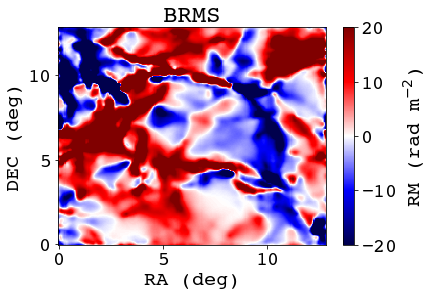

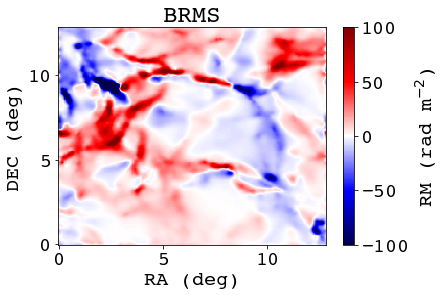

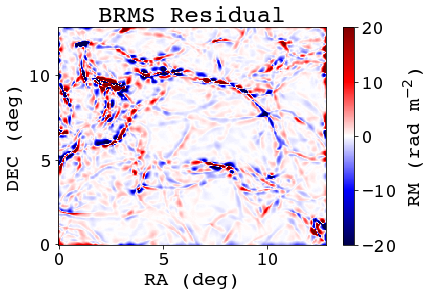

sampler: Iteration #0 energy=3.020732E+11 diff=3.020732E+11 crit=1.0E-07 clvl=0
sampler: Iteration #1 energy=4.398282E+09 diff=2.976749E+11 crit=1.0E-07 clvl=0
sampler: Iteration #2 energy=2.980130E+09 diff=1.418153E+09 crit=1.0E-07 clvl=0
sampler: Iteration #3 energy=2.329941E+09 diff=6.501888E+08 crit=1.0E-07 clvl=0
sampler: Iteration #4 energy=1.847111E+09 diff=4.828295E+08 crit=1.0E-07 clvl=0
sampler: Iteration #5 energy=1.234091E+09 diff=6.130206E+08 crit=1.0E-07 clvl=0
sampler: Iteration #6 energy=1.034296E+09 diff=1.997941E+08 crit=1.0E-07 clvl=0
sampler: Iteration #7 energy=7.494225E+08 diff=2.848740E+08 crit=1.0E-07 clvl=0
sampler: Iteration #8 energy=7.452225E+08 diff=4.199998E+06 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=6.063554E+08 diff=1.388671E+08 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=5.000394E+08 diff=1.063161E+08 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=3.979948E+08 diff=1.020446E+08 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=3.138972

Starting global iteration #0


sampler: Iteration #16 energy=1.995936E+08 diff=3.179135E+07 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=1.975704E+08 diff=2.023225E+06 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=1.801157E+08 diff=1.745466E+07 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=1.608476E+08 diff=1.926805E+07 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=1.606595E+08 diff=1.881460E+05 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=1.590570E+08 diff=1.602451E+06 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=1.289060E+08 diff=3.015105E+07 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=1.159450E+08 diff=1.296097E+07 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=1.031728E+08 diff=1.277224E+07 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=1.030931E+08 diff=7.964649E+04 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=1.015701E+08 diff=1.523061E+06 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=9.391698E+07 diff=7.653109E+06 crit=1.0E-07 clvl=0
sampler: Iteration #28 energ

Starting global iteration #1


sampler: Iteration #8 energy=-7.646903E+04 diff=3.008026E+02 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=-7.659170E+04 diff=1.226776E+02 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=-7.671836E+04 diff=1.266538E+02 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-7.683375E+04 diff=1.153929E+02 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-7.695720E+04 diff=1.234457E+02 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-7.696170E+04 diff=4.503932E+00 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-7.707863E+04 diff=1.169342E+02 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.708864E+04 diff=1.000814E+01 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.717740E+04 diff=8.875345E+01 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.728695E+04 diff=1.095587E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.735769E+04 diff=7.073459E+01 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.735787E+04 diff=1.798145E-01 crit=1.0E-07 clvl=0
sampler: Iteration

Starting global iteration #2


sampler: Iteration #16 energy=-7.552300E+04 diff=2.124607E+01 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.574611E+04 diff=2.231137E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.593441E+04 diff=1.883023E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.605062E+04 diff=1.162018E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.609014E+04 diff=3.952807E+01 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.620595E+04 diff=1.158012E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.620765E+04 diff=1.699845E+00 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.634473E+04 diff=1.370830E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.644453E+04 diff=9.979986E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.655801E+04 diff=1.134792E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.667010E+04 diff=1.120886E+02 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.670810E+04 diff=3.800741E+01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #3


sampler: Iteration #18 energy=-7.485209E+04 diff=3.228517E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.524771E+04 diff=3.956209E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.531002E+04 diff=6.231042E+01 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.548395E+04 diff=1.739296E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.572771E+04 diff=2.437657E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.594828E+04 diff=2.205701E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.595656E+04 diff=8.279212E+00 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.613089E+04 diff=1.743296E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.626950E+04 diff=1.386074E+02 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.639941E+04 diff=1.299065E+02 crit=1.0E-07 clvl=0
sampler: Iteration #28 energy=-7.642847E+04 diff=2.906885E+01 crit=1.0E-07 clvl=0
sampler: Iteration #29 energy=-7.652486E+04 diff=9.638486E+01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #4


sampler: Iteration #17 energy=-7.335672E+04 diff=5.622353E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.336249E+04 diff=5.776486E+00 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.347835E+04 diff=1.158593E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.368950E+04 diff=2.111481E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.417743E+04 diff=4.879283E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.451570E+04 diff=3.382718E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.486033E+04 diff=3.446303E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.509495E+04 diff=2.346197E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.526450E+04 diff=1.695468E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.532149E+04 diff=5.699269E+01 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.540294E+04 diff=8.144846E+01 crit=1.0E-07 clvl=0
sampler: Iteration #28 energy=-7.551436E+04 diff=1.114170E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #5


sampler: Iteration #15 energy=-7.148050E+04 diff=2.011386E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.202240E+04 diff=5.419024E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.284100E+04 diff=8.185955E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.330179E+04 diff=4.607976E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.395185E+04 diff=6.500523E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.406591E+04 diff=1.140658E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.407782E+04 diff=1.190752E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.452955E+04 diff=4.517345E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.488950E+04 diff=3.599440E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.512945E+04 diff=2.399507E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.544419E+04 diff=3.147371E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.559123E+04 diff=1.470446E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #6


sampler: Iteration #15 energy=-6.898543E+04 diff=1.227560E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.021639E+04 diff=1.230968E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.115853E+04 diff=9.421314E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.183260E+04 diff=6.740732E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.259699E+04 diff=7.643879E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.269926E+04 diff=1.022696E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.332338E+04 diff=6.241258E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.339700E+04 diff=7.361399E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.377006E+04 diff=3.730668E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.378463E+04 diff=1.456736E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.415062E+04 diff=3.659938E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.451964E+04 diff=3.690123E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #7


sampler: Iteration #15 energy=-6.927025E+04 diff=1.321611E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.052017E+04 diff=1.249924E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.156275E+04 diff=1.042572E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.233938E+04 diff=7.766395E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.292057E+04 diff=5.811895E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.349435E+04 diff=5.737773E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.356295E+04 diff=6.860296E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.362168E+04 diff=5.872225E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.400808E+04 diff=3.864026E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.420017E+04 diff=1.920908E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.442304E+04 diff=2.228741E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.467783E+04 diff=2.547876E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #8


sampler: Iteration #12 energy=-6.713462E+04 diff=2.047920E+03 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-6.718717E+04 diff=5.254120E+01 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-6.912686E+04 diff=1.939692E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.918479E+04 diff=5.792973E+01 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.037256E+04 diff=1.187777E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.121180E+04 diff=8.392365E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.198384E+04 diff=7.720419E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.267020E+04 diff=6.863600E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.321161E+04 diff=5.414127E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.329918E+04 diff=8.756843E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.387474E+04 diff=5.755586E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.400738E+04 diff=1.326382E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #9


sampler: Iteration #13 energy=-6.522062E+04 diff=2.646143E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-6.530689E+04 diff=8.626983E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.748342E+04 diff=2.176532E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.892275E+04 diff=1.439327E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-6.986608E+04 diff=9.433382E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.050404E+04 diff=6.379575E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.119010E+04 diff=6.860602E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.198580E+04 diff=7.957001E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.220993E+04 diff=2.241257E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.258284E+04 diff=3.729168E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.276539E+04 diff=1.825468E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.283372E+04 diff=6.832833E+01 crit=1.0E-07 clvl=0
sampler: Iterati

1718167434.190919


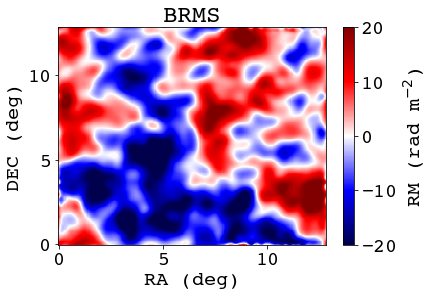

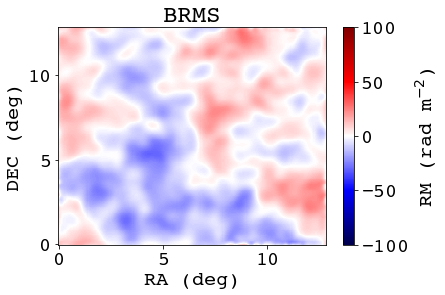

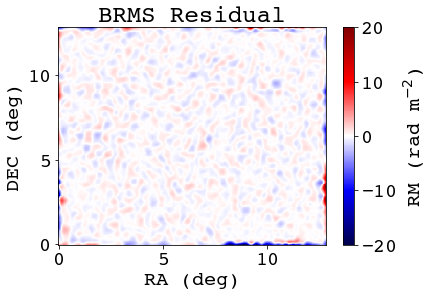

In [13]:

from inference import main as inference
from Parameters import inference_parameters_template as pm2
import time
ntheta_array = []
nphi_array = []


load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))

plot_path  = './Figs/'
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def BRMS_plotting(locations, ntheta_array, nphi_array, simulation_paths, nx = 256, ny = 256, return_arrays = True):
        """  
        Function to test BRMS interpolation for a foreground RM sky

        Parameters
        ----------
        locations: List of strings that provides the directory in which the data is stored inside the director './Data'
        ntheta_array: Arrays of RA values of the data points
        nphi_array: Arrays of DEC values of the data points
        simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
        epsilon: Float that controls the shape parameter; 1 by default 
        nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
        return_arrays: Boolean to control the return of data; True by default

        Returns
        --------
        val_BRMS_array: List of BRMS interpolation results for each grid
        """ 
        val_BRMS_array = []
        plot_path = './Figs/'

        if not os.path.exists(plot_path):
                os.makedirs(plot_path)

        for i in range(len(ntheta_array)):
                # Loading in the data
                ntheta = ntheta_array[i]
                nphi = nphi_array[i]
                simulation_path = simulation_paths[i]
                location = locations[i]

                fil_sim = np.load(simulation_path).transpose()

                fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

                x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

                # Performing the BRMS interpolation

                run_parameter_dict = getattr(pm2, 'run_params')
                domain_dict = getattr(pm2, 'domain_params')
                amp_dict = getattr(pm2, 'amplitude_params')
                sign_dict = getattr(pm2, 'sign_params')
                egal_dict = getattr(pm2, 'extragal_params')
                inference(**run_parameter_dict, location = location, amplitude_params=amp_dict, sign_params=sign_dict,
                        extragal_params=egal_dict, domain_parameters=domain_dict)
                current_time = time.time()
                print(current_time)
                
                val_BRMS = np.load("Runs/results/test/faraday_sky_mean.npy")
                val_BRMS = (np.transpose(val_BRMS))

                if 'patchy' in location: 
                        np.save('./Results/Patchy_Sky/BRMS_gal.npy', val_BRMS)
                        grid_name = 'patchy'

                elif 'fil' in location: 
                        np.save('./Results/Fil_Sky/BRMS_gal.npy', val_BRMS)
                        grid_name = 'fil'

                else: 
                        np.save('./Results/Example/BRMS_gal.npy', val_BRMS)
                        grid_name = 'example'

                # Plotting BRMS
                val_min, val_max = -20, 20

        
                funcx, funcy = np.meshgrid(x, y)

                fig1, ax1 = pl.subplots()
                pl.title("BRMS")  

                c1 = ax1.pcolormesh(funcx, funcy, val_BRMS, cmap='seismic', vmin=val_min, vmax=val_max)

                colorbar1 = fig1.colorbar(c1, ax = ax1)
                colorbar1.set_label('RM (rad m$^{-2}$)')
                ax1.set_xlabel('RA (deg)')
                ax1.set_ylabel('DEC (deg)')
                ax1.set_yticks((0, 5, 10))
                #pl.savefig(plot_path+"BRMS_gal_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
                pl.show()

                fig2, ax2 = pl.subplots()
                pl.title("BRMS")

                val_min, val_max = -100, 100
                c2 = ax2.pcolormesh(funcx, funcy, val_BRMS, cmap='seismic', vmin=val_min, vmax=val_max)

                colorbar2 = fig2.colorbar(c2, ax = ax2)
                colorbar2.set_label('RM (rad m$^{-2}$)')
                ax2.set_xlabel('RA (deg)')
                ax2.set_ylabel('DEC (deg)')
                ax2.set_yticks((0, 5, 10))
                #pl.savefig(plot_path+"BRMS_gal_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
                pl.show()

                fig3, ax3 = pl.subplots()
                pl.title("BRMS Residual")

                val_min, val_max = -20, 20
                c3 = ax3.pcolormesh(funcx, funcy, fil_sim-val_BRMS, cmap='seismic', vmin=val_min, vmax=val_max)
                colorbar3 = fig3.colorbar(c3, ax = ax3)
                colorbar3.set_label('RM (rad m$^{-2}$)')
                ax3.set_xlabel('RA (deg)')
                ax3.set_ylabel('DEC (deg)')
                ax3.set_yticks((0, 5, 10))
                #pl.savefig(plot_path+"BRMS_gal_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
                pl.show()


                val_BRMS_array.append(val_BRMS)


        if return_arrays:
                return val_BRMS_array
        else: 
                return
locations = ['simulated_cutout_fil', 'simulated_cutout_patchy']
val_BRMS_array = BRMS_plotting(locations, ntheta_array, nphi_array, simulation_paths)

## Analysis

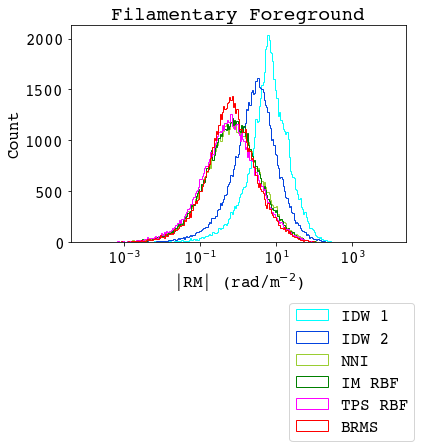

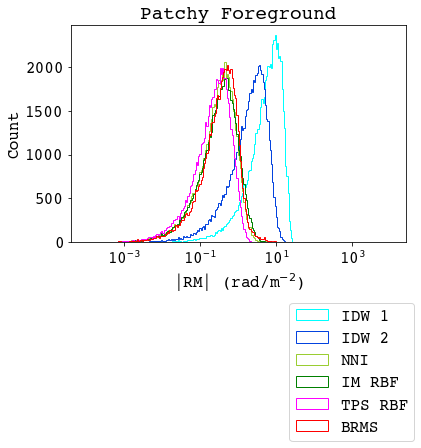

In [18]:
# Here we will plot the histogram 
import copy


def Plotting_Historgram(interpol_names, interpol_paths, simulation_paths): 
    ''' 
    Function to plot the power spectra of the interpolated RM maps
    Parameters
    ----------
    interpol_names: List of strings containing the names of the interpolation schemes
    interpol_paths: List of strings containing the paths to the interpolated RM maps 
    simulation_paths: List of strings containing the paths to the simulated foreground RMs

    Returns
    --------
    None
    '''
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"
    # Loading in the interpolated RM maps 
    val_arrays = [[], []]

    grid_names = ['fil', 'patchy']
    simulation_names = ['Results_Filamentary', 'Results_Patchy']
    simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
    
    for i in range(len(grid_names)): 
        simulation_path = simulation_paths[i]
        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:256, :256]))
        val_arrays[i].append(fil_sim)

    val_NNI_array = []
    for j in range(len(interpol_paths)):
        path = interpol_paths[j]
        for i in range(len(interpol_names)):
            name = interpol_names[i]
            val_arrays[j].append(np.load(  path + name +'.npy'))
            if name == 'NNI_gal': 
                val_NNI_array.append(np.load(  path + name +'.npy'))

    # Here, we will remove all points where NNI obtains nan values from all the arrays for fair comparison 

    def remove_nan(val, i): 
        val_nan_array = copy.deepcopy(val)
        val_nan_array = val_nan_array[~np.isnan(val_NNI_array[i])] 

        return val_nan_array

    grid_names = ['fil', 'patchy']
    plot_grids = ['Filamentary Foreground', 'Patchy Foreground']
    mean_res_array = [[], []]
    std_res_array = [[], []]
    colors = ['#00FFFF', '#0343DF', '#9ACD32', '#008000', '#FF00FF', '#FF0000']
    for i in range(len(grid_names)): 
        grid_name = grid_names[i]
        val_grid_array = val_arrays[i]

        fig, ax = pl.subplots()
        for j in range(1, len(val_grid_array)):
            val_array = val_grid_array[j]

            interpol_name = interpol_names[j-1] 
            if interpol_name[:3] == "IDW": 
                plot_name = interpol_name[:3] + " " + interpol_name[3:4]

            elif 'IM' in interpol_name:
                plot_name = interpol_name[:2] + " RBF"

            elif 'TPS' in interpol_name:
                plot_name = interpol_name[:3] + " RBF"
            elif 'NNI' in interpol_name:
                plot_name = interpol_name[:3]
            
            elif 'BRMS' in interpol_name:
                plot_name = interpol_name[:4]

            else:
                plot_name = interpol_name
            

            val_nan_array = remove_nan(val_array, i)
            bins = np.logspace(-4, 4, 256)
            ax.hist((np.abs(remove_nan(val_grid_array[0], i) - val_nan_array)), bins, histtype = 'step', label = plot_name, color = colors[j-1])
            mean_res_array[i].append(np.mean((np.abs(remove_nan(val_grid_array[0], i) - val_nan_array))))
            std_res_array[i].append(np.std((np.abs(remove_nan(val_grid_array[0], i) - val_nan_array))))

            #ax.hist(np.ravel(np.abs(val_grid_array[0] - val_array)), bins, histtype = 'step', label = plot_name, color = colors[j-1])
            #mean_res_array[i].append(np.mean(np.ravel(np.abs(val_grid_array[0] - val_array))))
            #std_res_array[i].append(np.std(np.ravel(np.abs(val_grid_array[0] - val_array))))

     
        ax.set_title(plot_grids[i])
        ax.legend(bbox_to_anchor = (1.05, -0.95), loc='lower right')
        ax.set_xlabel('|RM| (rad/m$^{-2}$)')
        ax.set_ylabel('Count')
        ax.set_xscale('log')
        #pl.savefig('./Figs/' + grid_name + '_gal_hist.png', dpi = 300, bbox_inches = 'tight')
        pl.show()
    return mean_res_array, std_res_array

interpol_names = ['IDW1_gal', 'IDW2_gal', 'NNI_gal', 'IM_gal', 'TPS_gal', 'BRMS_gal']

interpol_paths = ['./Results/Fil_Sky/', './Results/Patchy_Sky/']
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

mean_res_array, std_res_array = Plotting_Historgram(interpol_names, interpol_paths, simulation_paths)


In [22]:
from decimal import Decimal 

for array in integrals_array:
    print(["{:.2E}".format(Decimal((sub_array))) for sub_array in array])

['4.24E+11', '8.30E+10', '1.09E+10', '9.62E+9', '8.65E+9', '6.98E+9']
['1.08E+11', '1.42E+10', '1.47E+8', '2.03E+8', '7.49E+7', '1.46E+8']


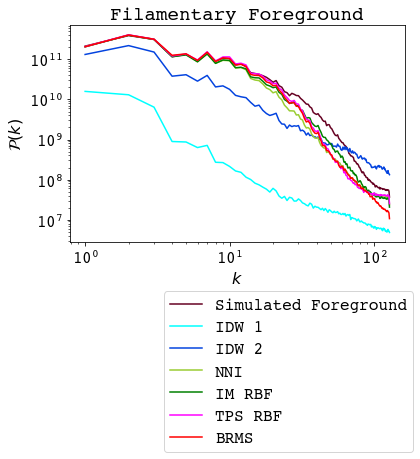

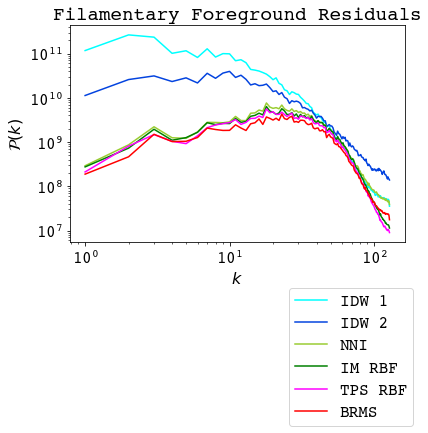

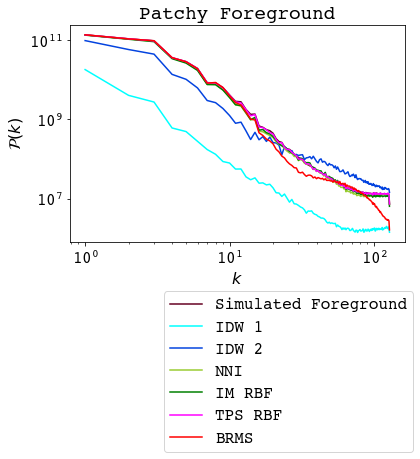

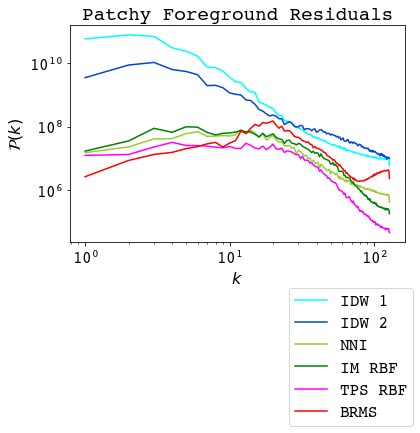

In [55]:
# Here, we will plot the power spectra

import scipy.stats as stats
import copy

def Plotting_Power_Spectrum(interpol_names, interpol_paths):
    ''' 
    Function to plot the power spectra of the interpolated RM maps
    Parameters
    ----------
    interpol_names: List of strings containing the names of the interpolation schemes
    interpol_paths: List of strings containing the paths where the interpolated RM maps are stored 

    
    Returns
    --------
    None
    '''
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"
    # Loading in the interpolated RM maps 
    val_arrays = [[], []]
    integrals_array = []

    grid_names = ['fil', 'patchy']
    simulation_names = ['Results_Filamentary', 'Results_Patchy']
    simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
    
    for i in range(len(grid_names)): 
        simulation_path = simulation_paths[i]
        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:256, :256]))
        val_arrays[i].append(fil_sim)

    val_NNI_array = []
    for j in range(len(interpol_paths)):
        path = interpol_paths[j]
        for i in range(len(interpol_names)):
            name = interpol_names[i]
            val_arrays[j].append(np.load(  path + name +'.npy'))
            if name == 'NNI_gal': 
                val_NNI_array.append(np.load(  path + name +'.npy'))


    # Here, we will remove all points where NNI obtains nan values from all the arrays for fair comparison 

    def remove_nan(val, i): 
        val_nan_array = copy.deepcopy(val)
        val_nan_array[np.isnan(val_NNI_array[i])] = 0

        return val_nan_array



    def Power_Spectrum(val):
        """
        Function to plot the Fourier power spectrum. Code modified from Bert Vanderbrouke, Universiteit Leiden. 

        Parameters
        ----------
        val: An array of the RM values
        name: A string that stores the name of the RM grid 

        Returns
        --------
        None
        """
        npix = val.shape[0]

        fourier_val = np.fft.fftn(val)
        fourier_amplitudes = np.abs(fourier_val)**2

        kfreq = np.fft.fftfreq(npix) * npix
        kfreq2D = np.meshgrid(kfreq, kfreq)
        knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

        knrm = knrm.flatten()
        fourier_amplitudes = fourier_amplitudes.flatten()

        kbins = np.arange(0.5, npix//2+1, 1.)
        kvals = 0.5 * (kbins[1:] + kbins[:-1])
        amp_bins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes, statistic = "mean", bins = kbins)
        amp_bins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
        return kvals, amp_bins
    colors = ['#650021', '#00FFFF', '#0343DF', '#9ACD32', '#008000', '#FF00FF', '#FF0000']
    plot_grids = ['Filamentary Foreground', 'Patchy Foreground']
    for i in range(len(grid_names)): 
        grid_name = grid_names[i]
        val_grid_array = val_arrays[i]
        integrals = []
        fig, ax = pl.subplots()
        fig2, ax2 = pl.subplots()
        for j in range(len(val_grid_array)):
            val_array = val_grid_array[j]
            if j == 0:
                interpol_name = 'Simulated Foreground'
            else:
                interpol_name = interpol_names[j-1] 

            if 'IDW' in interpol_name: 
                plot_name = interpol_name[:3] + " " + interpol_name[3:4]

            elif 'IM' in interpol_name:
                plot_name = interpol_name[:2] + " RBF"
            elif 'TPS' in interpol_name:
                plot_name = interpol_name[:3] + " RBF"

            elif 'NNI' in interpol_name:
                plot_name = interpol_name[:3]
            elif 'BRMS' in interpol_name:
                plot_name = interpol_name[:4]

            else:
                plot_name = interpol_name
            
            

            val_nan_array = remove_nan(val_array, i)
            kvals, amp_bins = Power_Spectrum(val_nan_array)


            ax.plot(kvals, amp_bins, label = plot_name, color = colors[j])
            
            if j >= 1:
                kvals_res, amp_bins_res = Power_Spectrum(remove_nan(val_grid_array[0], i) - val_nan_array)
                integral_res = np.trapz(amp_bins_res / np.array(kvals_res), kvals_res)
                integrals.append(integral_res)
                ax2.plot(kvals_res, amp_bins_res, label = plot_name, color = colors[j])
        integrals_array.append(integrals)
     
        ax.set_title(plot_grids[i])
        ax.legend(bbox_to_anchor = (1.05, -1), loc='lower right')
        ax.loglog()
        ax.set_xlabel('$k$')
        ax.set_ylabel('$\mathcal{P}(k)$')
        #fig.savefig('./Figs/' + grid_name + '_gal_power.png', bbox_inches = 'tight')

        ax2.set_title(plot_grids[i] + ' Residuals')
        ax2.legend(bbox_to_anchor = (1.05, -0.88), loc = 'lower right')
        ax2.loglog()
        ax2.set_xlabel('$k$')
        ax2.set_ylabel('$\mathcal{P}(k)$')
        #fig2.savefig('./Figs/' + grid_name + '_gal_power_res.png', bbox_inches = 'tight')
      
    return integrals_array
interpol_names = ['IDW1_gal', 'IDW2_gal', 'NNI_gal', 'IM_gal', 'TPS_gal', 'BRMS_gal']

interpol_paths = ['./Results/Fil_Sky_1.5/', './Results/Patchy_Sky_1.5/']

integrals_array = Plotting_Power_Spectrum(interpol_names = interpol_names, interpol_paths = interpol_paths)

In [26]:
mean_res_array

[[12.042164331647722,
  6.167646293058039,
  2.5427608537165103,
  2.377358857463923,
  2.1631849961962546,
  1.9739274384772647],
 [7.009814656119265,
  2.7548292106261667,
  0.435483286274493,
  0.48266519075505865,
  0.31950355045287604,
  0.5061923080657404]]

In [57]:
from decimal import Decimal 


for array in integrals_array:
    print(["{:.2E}".format(Decimal((sub_array))) for sub_array in array])

['4.24E+11', '8.30E+10', '1.09E+10', '9.62E+9', '8.65E+9', '6.98E+9']
['1.08E+11', '1.42E+10', '1.47E+8', '2.03E+8', '7.49E+7', '1.46E+8']


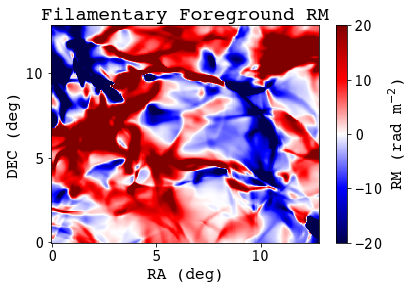

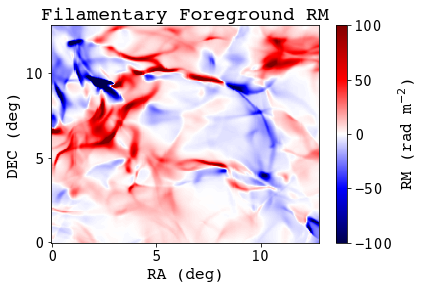

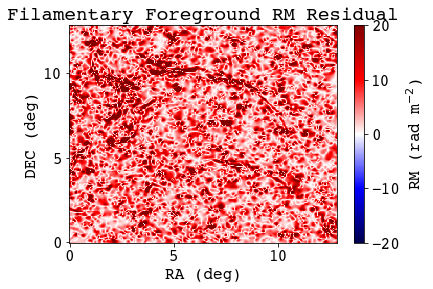

7.211762356971288


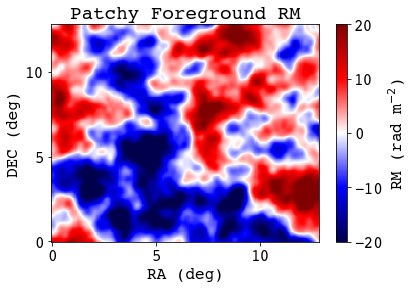

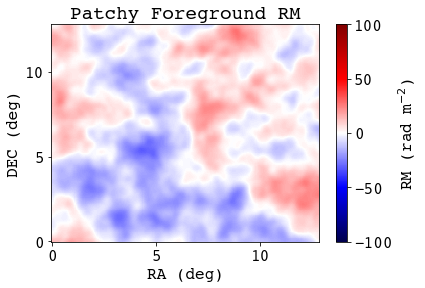

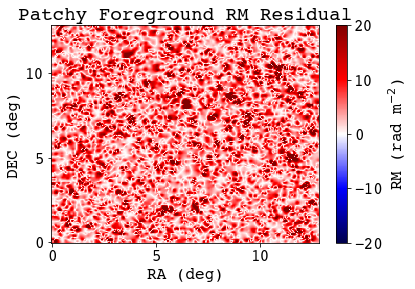

5.94948117474995


In [87]:
ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']
load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 16})
pl.rcParams["font.family"] = "Courier"

nx, ny = 256, 256
plot_path = './Figs/'

grid_names = ['Fil', 'Patchy']
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

interpol_paths = ['./Results/Fil_Sky/', './Results/Patchy_Sky/']

for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

for i in range(len(ntheta_array)):
    path = load_paths[i]
    simulation_path = simulation_paths[i]
    ntheta = ntheta_array[i]
    nphi = nphi_array[i]
    grid_name = grid_names[i]
    interpol_path = interpol_paths[i]

    interpol_name = 'IM'

    val_array = np.load(interpol_path + interpol_name + '.npy')

    fil_sim = np.load(simulation_path).transpose()

    fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

    x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)
    
    # Plotting the results

    funcx, funcy = np.meshgrid(x, y)

    if "IDW" in interpol_name:
        plot_name = interpol_name[:3] + " " + interpol_name[3:]
    elif interpol_name == "IM" or interpol_name == "TPS":
        plot_name = interpol_name + " RBF"
    else: 
        plot_name = interpol_name
    
    if "Fil" in grid_name: 
        plot_name  = "Filamentary Foreground RM" 
    else: 
        plot_name = "Patchy Foreground RM"
    cmap = pl.cm.get_cmap('seismic').copy()
    cmap.set_bad('gray')

    fig1, ax1 = pl.subplots()
    pl.title(plot_name)
    val_min, val_max = -20, 20
    c1 = ax1.pcolormesh(funcx, funcy, fil_sim, cmap=cmap, vmin=val_min, vmax=val_max)
    colorbar1 = fig1.colorbar(c1, ax = ax1)
    colorbar1.set_label('RM (rad m$^{-2}$)')
    ax1.set_xlabel('RA (deg)')
    ax1.set_ylabel('DEC (deg)')
    ax1.set_yticks((0, 5, 10))
    #pl.savefig(plot_path +  "{}_sky_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
    pl.show()

    fig2, ax2 = pl.subplots()
    pl.title(plot_name)
    val_min, val_max = -100, 100

    c2 = ax2.pcolormesh(funcx, funcy, fil_sim, cmap=cmap, vmin=val_min, vmax=val_max)
    colorbar2 = fig2.colorbar(c2, ax = ax2)
    colorbar2.set_label('RM (rad m$^{-2}$)')
    ax2.set_xlabel('RA (deg)')
    ax2.set_ylabel('DEC (deg)')
    ax2.set_yticks((0, 5, 10))
    #pl.savefig(plot_path + "{}_sky_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
    pl.show()


    # Plotting the residuals for NNI

    fig3, ax3 = pl.subplots()
    pl.title( plot_name + " Residual")
    val_min, val_max = -20, 20
    c3 = ax3.pcolormesh(funcx, funcy, np.abs(fil_sim-val_array), cmap = cmap, vmin = val_min, vmax = val_max)
    colorbar3 = fig3.colorbar(c3, ax = ax3)
    colorbar3.set_label('RM (rad m$^{-2}$)')
    ax3.set_xlabel('RA (deg)')
    ax3.set_ylabel('DEC (deg)')
    ax3.set_yticks((0, 5, 10))
    ##pl.savefig(plot_path + interpol_name + "_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
    pl.show()
    print(np.mean(np.abs(fil_sim-val_array)))

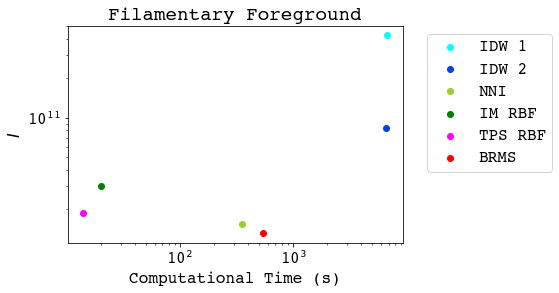

In [54]:
# Producing the plots for computational time vs accuracy

pl.rcParams.update({'font.size': 16})
pl.rcParams["font.family"] = "Courier"

times = [6827, 6634, 357, 20, 14, 546]
accuracy =  [4.24e+11,
  8.39e+10,
  1.53e+10,
  3.01e+10,
  1.85e+10,
  1.31e+10]
names = ['IDW 1', 'IDW 2', 'NNI', 'IM RBF', 'TPS RBF', 'BRMS']


colors = ['#00FFFF', '#0343DF', '#9ACD32', '#008000', '#FF00FF', '#FF0000']

for i in range(len(times)): 
    pl.scatter(times[i], accuracy[i], c = colors[i], label = names[i])
pl.xlabel('Computational Time (s)')
pl.ylabel('$I$')
pl.loglog()
pl.legend(bbox_to_anchor = (1.05, 1))
pl.title('Filamentary Foreground')
#pl.savefig('./Figs/fil_egal.png', bbox_inches = 'tight', dpi = 300)

In [30]:
import numpy as np
final_array = []
j = 0
for i in range(len(integrals_array[j])): 
    integral = integrals_array[j][i]
    mean_res = mean_res_array[j][i]
    final_array.append(np.mean((integral, mean_res*10**9)))

In [50]:
# Here, we will be plotting accuracy vs noise sigma 

from glob import glob 
from copy import deepcopy

names = ['Fil', 'Patchy']
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
nx, ny = 256, 256

interpol_names = ['IDW1', 'IDW2', 'NNI', 'IM', 'TPS', 'BRMS']
noise_sigma = [1.5, 3, 4.5, 6, 7.5, 9]

for i in range(len(names)):
    interpolations = [[], [], [], [], [], []]
    residual_array  = [[], [], [], [], [], []]
    for indx in range(len(noise_sigma)):
        for interpol in interpol_names:
            interpolations[indx].append(np.load('./Results/'+names[i]+'_Sky_'+str(noise_sigma[indx])+'/'+interpol +'.npy')) 
    for interpolation in interpolations:
        



    
    